In [1]:
import pandas as pd
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.decomposition
import sklearn.svm
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
pipeline = sklearn.pipeline.Pipeline([
    ['poly', sklearn.preprocessing.PolynomialFeatures(2)],
    ['PCA Dimension Reduction', sklearn.decomposition.PCA(n_components=13)],
    ['Logistic',sklearn.linear_model.LogisticRegression()]
])

In [3]:
df = pd.read_csv('flow cytometry_12panel_rawdata_all4.csv')
df1 = df.copy()
df1

,cell,A,B,C,D,E,F,G,H,I,J,K,L,poly,know
0,positive,3.727379,4.308543,3.064458,4.447360,4.720358,4.958535,4.990037,3.701222,3.517460,3.709694,4.776476,2.841359,4.844893,1
1,positive,3.814381,4.205150,2.768638,4.115644,4.347681,4.674200,4.791185,3.476542,3.221936,3.418798,4.665572,2.943989,4.798257,1
2,positive,3.919235,4.278822,3.002166,4.556664,4.694316,4.936775,5.026378,3.830525,3.533518,3.706888,4.734416,2.911158,4.932986,1
3,negative,2.846337,2.869818,2.861534,2.875061,2.863917,2.845098,2.867467,2.866287,2.877947,2.880814,2.910624,2.889302,2.957607,2
4,negative,2.972203,2.885361,2.919078,2.913284,2.923244,2.915400,2.915400,2.909021,2.920123,2.913284,2.910091,2.860338,3.057666,2
5,negative,3.236537,3.222456,3.227630,3.267641,3.274389,3.324694,3.266702,3.234264,3.372912,3.221153,3.220892,3.224274,3.183839,2
6,DVI,2.522444,2.889302,2.501059,2.534026,2.628389,4.073388,2.841985,2.673021,2.690196,2.666518,2.474216,2.440909,2.974051,6
7,DVI,2.911158,3.739968,2.972203,2.982271,2.973590,4.062243,3.105169,3.054996,2.984977,2.974051,2.942504,2.777427,3.161068,6
8,DVI,2.920123,3.830845,2.912753,2.925312,2.922206,4.204934,3.133219,3.054996,2.943989,2.919078,2.916454,2.846337,2.829947,6
9,DVI,2.903090,3.830845,2.941014,2.942504,2.980003,4.315614,3.125156,3.095169,2.975432,2.966611,2.921166,2.875640,2.937016,6


In [4]:
df_col = df1.drop('cell', axis =1)
df_col1 = df_col.drop('know', axis =1)

#feature_cols = df_col1.columns.tolist()
feature_cols = ['K','F','A']
print(feature_cols)

xs = df[feature_cols]
x = StandardScaler().fit_transform(xs)

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])
finalDf = pd.concat([principalDf, df['know']], axis = 1)


principalDf


['K', 'F', 'A']


,principal component 1,principal component 2,principal component 3
0,2.802687,0.248468,-0.167776
1,2.606166,-0.196344,0.100161
2,3.058898,0.053048,0.231780
3,-1.970519,-1.089395,-0.052657
4,-1.707083,-1.107239,0.183911
5,-0.672797,-0.913585,0.385239
6,-1.784204,1.224741,-0.244480
7,-0.785298,0.609401,0.040153
8,-0.668432,0.821641,0.081845
9,-0.596146,0.997231,0.045580


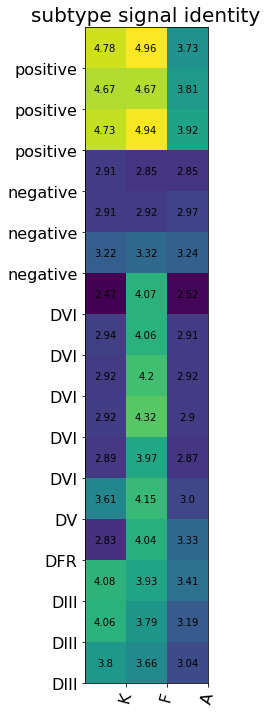

In [47]:
fig,ax1 = plt.subplots(figsize = (10,10))

heatmap_s = ax.pcolor(df_col1[feature_cols], cmap='Reds', )

#cbar =  plt.colorbar(heatmap_s)
cbar.set_label('flow cytometry intensity', fontsize =16)

ax.set_yticks(np.arange(df_col1[feature_cols].shape[0]) + 0.5, minor=False)
ax.set_xticks(np.arange(df_col1[feature_cols].shape[1]) + 0.5, minor=False)

ax.set_xticklabels(feature_cols, rotation=75, fontsize =16)
ax.set_yticklabels(df['cell'], fontsize =16)
ax.set_title('subtype signal identity', fontsize =20)

df_col1[feature_cols]

ax1.imshow(df_col1[feature_cols])
ax1.set_yticks(np.arange(df_col1[feature_cols].shape[0]) + 0.5, minor=False)
ax1.set_xticks(np.arange(df_col1[feature_cols].shape[1]) + 0.5, minor=False)

ax1.set_xticklabels(feature_cols, rotation=75, fontsize =16)
ax1.set_yticklabels(df['cell'], fontsize =16)
ax1.set_title('subtype signal identity', fontsize =20)

xx = np.round(np.array(df_col1[feature_cols]),2)

for i in range(16):
    for j in range(3):
        text = ax1.text(j, i, xx[i, j],ha="center", va="center", color="k")
        
fig.tight_layout()
plt.show()


In [253]:
xprincipalDf = principalDf.iloc[:,:3]
xprincipalDf['Cluster'] = k_Cluster
xprincipalDf['Know'] =df['know']
print(feature_cols)
xprincipalDf


['K', 'F', 'A']


C:\Users\Arada\Miniconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Arada\Miniconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,principal component 1,principal component 2,principal component 3,Cluster,Know
0,2.802687,0.248468,-0.167776,3,1
1,2.606166,-0.196344,0.100161,3,1
2,3.058898,0.053048,0.231780,3,1
3,-1.970519,-1.089395,-0.052657,2,2
4,-1.707083,-1.107239,0.183911,2,2
5,-0.672797,-0.913585,0.385239,2,2
6,-1.784204,1.224741,-0.244480,0,6
7,-0.785298,0.609401,0.040153,0,6
8,-0.668432,0.821641,0.081845,0,6
9,-0.596146,0.997231,0.045580,0,6


In [71]:
df_col = df1.drop('cell', axis =1)
df_col1 = df_col.drop('know', axis =1)

#feature_cols = df_col1.columns.tolist()
feature_cols = ['A','B','C','D','E','F','G','H','I','J','K','L']
print(feature_cols)

xs = df[feature_cols]
x = StandardScaler().fit_transform(xs)

pca = PCA(n_components=12)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4','principal component 5','principal component 6','principal component 7','principal component 8','principal component 9','principal component 10','principal component 11','principal component 12'])
finalDf = pd.concat([principalDf, df['know']], axis = 1)


['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L']


array([2.51629945, 0.55562035, 0.12808021])

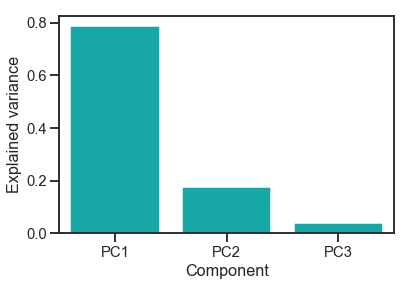

In [73]:
import seaborn as sns
df_2 = pd.DataFrame({'Explained variance':pca.explained_variance_ratio_,
             'Component':['PC1', 'PC2','PC3']})
fig2 =plt.figure()
sns.barplot(x="Component" ,y="Explained variance", data=df_2, color="c");

pca.explained_variance_

array([7.21369231e-01, 1.59427292e-01, 5.83964706e-02, 2.73294895e-02,
       1.51331213e-02, 1.13172320e-02, 3.75474837e-03, 1.82362637e-03,
       6.82360935e-04, 5.25550956e-04, 2.07814035e-04, 3.30636341e-05])

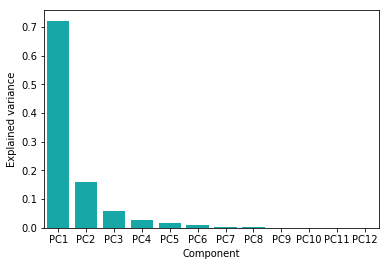

In [92]:
df_2 = pd.DataFrame({'Explained variance':pca.explained_variance_ratio_,
             'Component':['PC1', 'PC2','PC3','PC4', 'PC5','PC6','PC7', 'PC8','PC9','PC10', 'PC11','PC12']})
fig2 =plt.figure()
sns.barplot(x="Component" ,y="Explained variance", data=df_2, color="c");
pca.explained_variance_ratio_

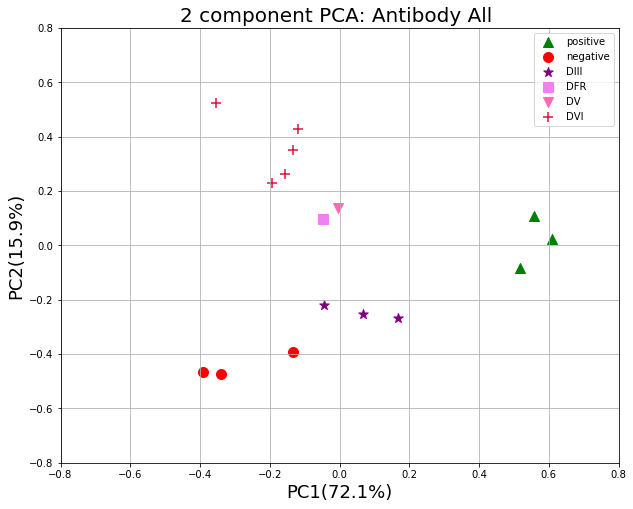

In [7]:
pd.DataFrame(pca.components_, columns=feature_cols).T

fig1 = plt.figure(figsize = (10,8))
    
def myplot(score,coeff,labels=None):
        xs = score[:,0]
        ys = score[:,1]
        z = coeff.shape[0]
        scalex = 1.0/(xs.max() - xs.min())
        scaley = 1.0/(ys.max() - ys.min())
   

        plt.scatter(finalDf.loc[finalDf['know'] == 1, 'principal component 1']* scalex, finalDf.loc[finalDf['know'] == 1, 'principal component 2']* scaley,  s= 100,marker='^',c= 'g',label = 'positive' ) 
        plt.scatter(finalDf.loc[finalDf['know'] == 2, 'principal component 1']* scalex, finalDf.loc[finalDf['know'] == 2, 'principal component 2']* scaley,  s= 100,marker='o',c= 'r',label = 'negative' ) 
        plt.scatter(finalDf.loc[finalDf['know'] == 3 , 'principal component 1']* scalex, finalDf.loc[finalDf['know'] == 3 , 'principal component 2']* scaley,  s= 100,marker='*',c= 'purple',label = 'DIII' ) 
        plt.scatter(finalDf.loc[finalDf['know'] == 4, 'principal component 1']* scalex, finalDf.loc[finalDf['know'] == 4, 'principal component 2']* scaley,  s= 100,marker='s',c= 'violet',label = 'DFR' ) 
        #plt.scatter(finalDf.loc[finalDf['know'] == 4, 'principal component 1']* scalex, finalDf.loc[finalDf['know'] == 4, 'principal component 2']* scaley,  s= 100,marker='*',c= 'pink',label = 'weakD type1&2' ) 
        plt.scatter(finalDf.loc[finalDf['know'] == 5, 'principal component 1']* scalex, finalDf.loc[finalDf['know'] == 5, 'principal component 2']* scaley,  s= 100,marker='v',c= 'hotpink',label = 'DV' ) 
        plt.scatter(finalDf.loc[finalDf['know'] == 6, 'principal component 1']* scalex, finalDf.loc[finalDf['know'] == 6, 'principal component 2']* scaley,  s= 100,marker='+',c= 'crimson',label = 'DVI' ) 
        #plt.scatter(data_average.iloc[data_average['know']==1, 'principal component 1'] *scalex, data_average.iloc[data_average['know']==1, 'principal component 2']* scaley,  s= 100,marker='+',c= 'crimson',label = 'DVI' ) 
        #plt.scatter(data_average['principal component 1']*scalex ,data_average['principal component 2']*scaley )
        
       # for i, txt in enumerate(df1['cell']):
            #plt.annotate(txt, (finalDf['principal component 1'][i]*scalex,finalDf['principal component 2'][i]* scaley))
       
        labels  =  feature_cols
       # plt.scatter(xs * scalex,ys * scaley)
       # for i in range(z):
         #   plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
           # if labels is None:
             #   plt.text(coeff[i,0], coeff[i,1] , "Var"+str(i+1), color = 'b', ha = 'center', va = 'center')
           # else:
             #   plt.text(coeff[i,0], coeff[i,1] , labels[i], color = 'b', ha = 'center', va = 'center')
     
        plt.legend()
        plt.ylim(-0.8,0.8)
        plt.xlim(-0.8,0.8)
        plt.title('2 component PCA: Antibody All ', fontsize = 20)
        plt.xlabel("PC1(72.1%)", fontsize = 18)
        plt.ylabel("PC2(15.9%)", fontsize = 18)
        plt.grid()
        
myplot(principalComponents[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

#fig1.savefig("polyGF_PCA.pdf", bbox_inches='tight')


Text(0.5, 1.0, 'subtype signal identity')

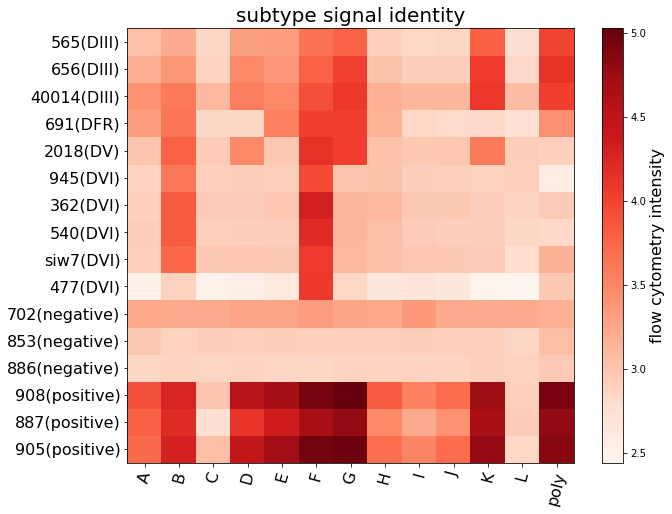

In [38]:
Cols = ['A','B','C','D','E','F','G','H','I','J','K','L', 'poly']

fig,ax = plt.subplots(figsize = (10,8))

heatmap_s = ax.pcolor(df_col1.iloc[:,:], cmap='Reds')

cbar =  plt.colorbar(heatmap_s)
cbar.set_label('flow cytometry intensity', fontsize =16)

ax.set_yticks(np.arange(df_col1.iloc[:,:].shape[0]) + 0.5, minor=False)
ax.set_xticks(np.arange(df_col1.iloc[:,:].shape[1]) + 0.5, minor=False)

ax.set_xticklabels(Cols, rotation=75, fontsize =16)
ax.set_yticklabels(df['cell'], fontsize =16)
ax.set_title('subtype signal identity', fontsize =20)


In [23]:
antibody = ['A','B','C','D','E','F','G','H','I','J','K','L','poly']
reduced_dimention = [];
reduced_column = [];
p_combination = [];
for k in range(0,13):
    for kk in range(0,13):
        for kkk in range(0,13):
            if k> kk & kk>kkk:
                reduced_dimention.append([antibody[k],antibody[kk],antibody[kkk]])
                s= ""
                As = [antibody[k],'-',antibody[kk],'-',antibody[kkk]]
                p_combination.append(s.join(As))
                reduced_column.append([k,kk,kkk])
                

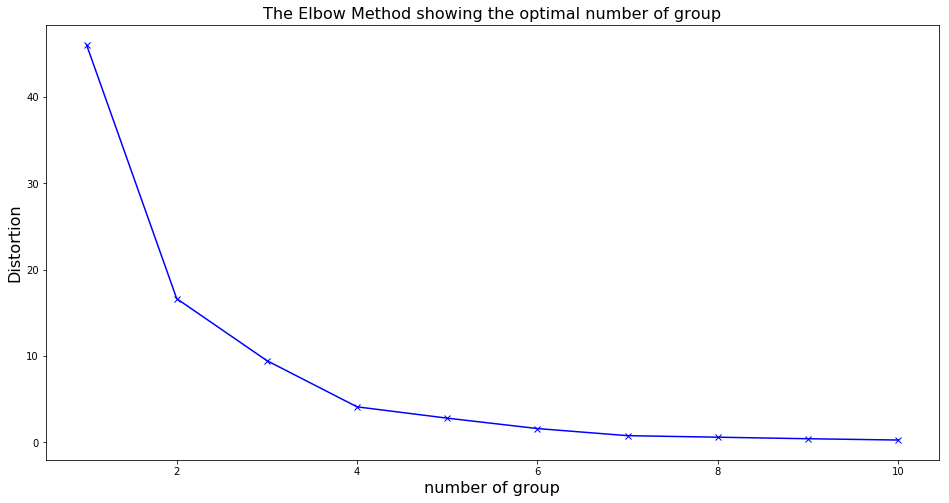

[[ 0.13961247 -0.23640909]
 [-0.96308286  0.83741821]
 [ 2.82258345  0.03505749]
 [-1.4501328  -1.03673936]]


[4]

In [7]:
distortions = []
distortion_ab = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    k_Cluster = kmeanModel.fit(principalDf.iloc[:,:2])
    distortions.append(kmeanModel.inertia_)
distortion_ab.append(optimal_number_of_clusters(distortions))
    
fig2 = plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('number of group',fontsize =16)
plt.ylabel('Distortion',fontsize =16)
plt.title('The Elbow Method showing the optimal number of group',fontsize =16)
plt.show()

distortions[5]
kmeanModel = KMeans(n_clusters=4)
k_Cluster = kmeanModel.fit_predict(principalDf.iloc[:,:2])
print(kmeanModel.cluster_centers_)


distortion_ab
#fig2.savefig("polyGF_elbow.pdf", bbox_inches='tight')

In [99]:
distortion_ab = []
acc = []

for ab in reduced_dimention:
    xs = df[ab]
    x = StandardScaler().fit_transform(xs)
    pca = PCA(n_components=3)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])
    finalDf = pd.concat([principalDf, df['know']], axis = 1)
    distortions = []
    K = range(1,10)
    for k in K:
        kmeanModel = KMeans(n_clusters=k)
        kmeanModel.fit(principalDf.iloc[:,:3])
        distortions.append(kmeanModel.inertia_)
    distortion_ab.append(optimal_number_of_clusters(distortions))
    kmean_with_cluster = KMeans(n_clusters=optimal_number_of_clusters(distortions))
    k_Cluster =kmean_with_cluster.fit_predict(principalDf.iloc[:,:2])
    acc.append(cluster_accuracy(df['know'], kmean_with_cluster.labels_))
    
distortion_ab

[4,
 3,
 4,
 3,
 3,
 4,
 3,
 3,
 3,
 4,
 3,
 5,
 4,
 3,
 3,
 4,
 3,
 3,
 4,
 3,
 3,
 4,
 3,
 3,
 3,
 4,
 3,
 3,
 4,
 3,
 4,
 3,
 4,
 4,
 4,
 3,
 4,
 3,
 3,
 3,
 4,
 3,
 3,
 4,
 2,
 3,
 3,
 5,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 3,
 5,
 3,
 3,
 4,
 3,
 3,
 4,
 2,
 3,
 3,
 5,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 2,
 3,
 4,
 3,
 2,
 3,
 3,
 3,
 4,
 4,
 2,
 3,
 4,
 2,
 3,
 4,
 2,
 3,
 3,
 5,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 2,
 3,
 4,
 2,
 2,
 3,
 3,
 2,
 3,
 4,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 5,
 3,
 4,
 4,
 3,
 3,
 4,
 3,
 4,
 3,
 4,
 4,
 4,
 3,
 4,
 3,
 3,
 3,
 4,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 4,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 5,
 5,
 4,
 4,
 4,
 4,
 5,
 5,
 4,
 5,
 4,
 4,
 4,
 5,
 4,
 4,
 5,
 3,
 4,
 4,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 4,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 3,
 4,
 4,
 3,
 4,
 4,
 3,
 4,
 3,
 4,
 4,
 4,
 3,
 4,
 4,
 3,
 3,
 4,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 3,
 3,


In [6]:
def optimal_number_of_clusters(wcss):
    x1, y1 = 1, wcss[0]
    x2, y2 = 10, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+1
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = np.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 1

In [100]:
d = {'Ab' : p_combination, 'distortions' : distortion_ab,'ACC' : acc}
distor_df = pd.DataFrame(d)

distor = distor_df.sort_values(by= 'ACC', ascending = False) 

distor.head(20)
#plt.figure(figsize=(16,8))
#sns.barplot(p_combination, distor.distortions)

,Ab,distortions,ACC
34,G-F-E,4,0.8750
234,poly-F-E,4,0.8750
30,G-F-A,4,0.8750
33,G-F-D,4,0.8750
133,K-F-D,4,0.8750
134,K-F-E,4,0.8750
233,poly-F-D,4,0.8750
140,K-G-F,4,0.8750
240,poly-G-F,4,0.8750
270,poly-K-F,4,0.8750


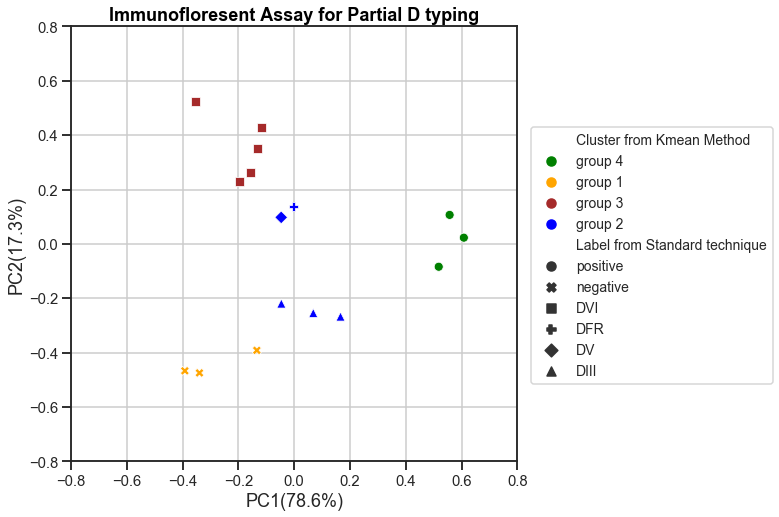

In [10]:

cmap =sns.hls_palette(3, l=.3, s=.8)
fig1 = plt.figure(figsize = (8,8))

xs = principalComponents[:,0]
ys = principalComponents[:,1]
z = np.transpose(pca.components_[0:2, :]).shape[0]
scalex = 1.0/(xs.max() - xs.min())
scaley = 1.0/(ys.max() - ys.min())
   
x_new = principalDf['principal component 1']*scalex.tolist()
y_new =principalDf['principal component 2']*scaley.tolist()
marker = dict({ 1 : 'o', 2 :  '.', 3: 'x',4: '*',5: 'v',6: '^'})
labels = []
#for x in df1['know'] :
  #  for l,b in zip(marker.keys(),marker.values()):
    #    if l == x:
      #      labels.append(b)
scalex,scaley 


df_tem = pd.DataFrame([x_new,y_new,k_Cluster, df1['know']]).T
df_tem.columns = ['X','Y','Cluster from Kmean Method','Label from Standard technique']
df_tem['Label from Standard technique']=df_tem['Label from Standard technique'].map({1:'positive', 2:'negative', 3:'DIII', 4:'DV', 5:'DFR', 6:'DVI'})
df_tem['Cluster from Kmean Method']=df_tem['Cluster from Kmean Method'].map({0:'group 2', 1:'group 3', 2:'group 4', 3:'group 1'})

sns.scatterplot(x='X', y='Y', hue = 'Cluster from Kmean Method', style = 'Label from Standard technique', data=df_tem,palette=['green','orange','brown','blue']) 

fontdict={'fontsize': 18,
          'weight' : 'bold',
         'horizontalalignment': 'center'}

sns.set_context('talk', font_scale=0.9)
sns.set_style('ticks')
   #                 palette=['green','orange','brown','blue'], legend='full', size='Season', sizes=[100,100,100,100])
#plt.scatter(principalDf['principal component 1']*scalex, principalDf['principal component 2']*scaley, c = k_Cluster , marker = labels)
#sns.scatterplot(x='X', y = 'Y', data = df, hue = 'Cluster', style= labels, s =100, palette= cmap)
# df_tem
#df_tem


plt.legend(scatterpoints=1,
           bbox_to_anchor=(1, 0.8), loc=2, borderaxespad=1.,
           ncol=1,
           fontsize=14)


plt.title('Immunofloresent Assay for Partial D typing', fontdict=fontdict, color="black",
         position=(0.5,1));
plt.ylim(-0.8,0.8)
plt.xlim(-0.8,0.8)
#plt.title('2 component PCA: Antibody All ', fontsize = 20)
plt.xlabel("PC1(78.6%)", fontsize = 18)
plt.ylabel("PC2(17.3%)", fontsize = 18)
plt.grid()

df_tem

fig1.savefig("KFA_visualize.pdf", bbox_inches='tight')

In [231]:
import numpy as np
from sklearn import metrics
from scipy.optimize import linear_sum_assignment

def cluster_accuracy(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)

    # Find optimal one-to-one mapping between cluster labels and true labels
    row_ind, col_ind = linear_sum_assignment(-contingency_matrix)

    # Return cluster accuracy
    return contingency_matrix[row_ind, col_ind].sum() / np.sum(contingency_matrix)

def coefficient_var(matrix):
    cv =  lambda x: np.std(x) / np.mean(x)
    var = np.apply_along_axis(cv, axis=0, arr=matrix)
    idmax = np.argmax(var)
    return idmax

In [233]:
#cluster_accuracy(df['know'], kmeanModel.labels_)
coefficient_var([x_new, y_new])

10

array([[ 8.        ,  9.        ,  0.18505846,  2.        ],
       [ 3.        ,  4.        ,  0.21708474,  2.        ],
       [ 0.        ,  2.        ,  0.29559823,  2.        ],
       [ 7.        , 16.        ,  0.43137658,  3.        ],
       [14.        , 15.        ,  0.51405338,  2.        ],
       [10.        , 19.        ,  0.64181456,  4.        ],
       [13.        , 20.        ,  0.90271456,  3.        ],
       [ 1.        , 18.        ,  1.00600236,  3.        ],
       [11.        , 12.        ,  1.37279318,  2.        ],
       [ 5.        , 17.        ,  1.48862976,  3.        ],
       [ 6.        , 21.        ,  1.82681177,  5.        ],
       [22.        , 24.        ,  2.00678417,  5.        ],
       [25.        , 26.        ,  2.60096732,  8.        ],
       [27.        , 28.        ,  3.97996459, 13.        ],
       [23.        , 29.        ,  8.49711018, 16.        ]])

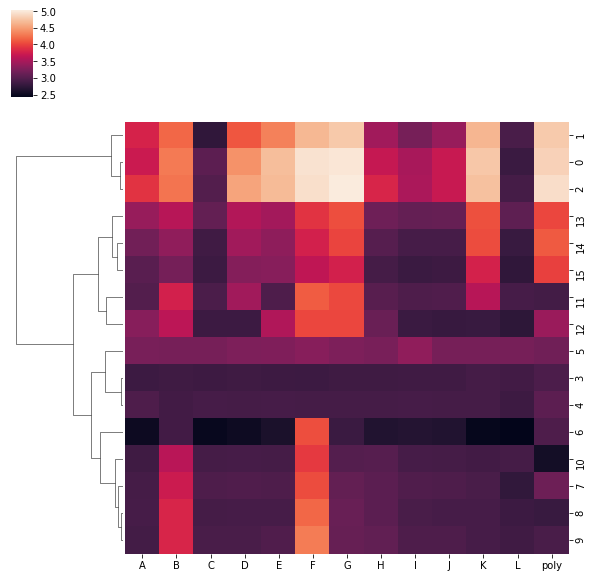

In [6]:
#pd.pivot_table(d)
#g_panel = sns.clustermap(np.transpose(np.array(df_col1.iloc[:,:]),axes = None), row_linkage=df['cell'], col_linkage= Cols,method='ward', metric='euclidean', col_cluster=False,)
g_panel = sns.clustermap(df_col1 ,method='ward', metric='euclidean', col_cluster=False,)
#plt.setp(g_panel.ax_heatmap.set_yticklabels(Cols, rotation=0))
#plt.setp(g_panel.ax_heatmap.set_yticklabels(df['cell'], rotation=0))
g_panel.dendrogram_row.linkage

['positive', 'positive', 'positive', 'negative', 'negative', 'negative', 'DVI', 'DVI', 'DVI', 'DVI', 'DVI', 'DV', 'DFR', 'DIII', 'DIII', 'DIII']


AttributeError: 'dict' object has no attribute 'ax'

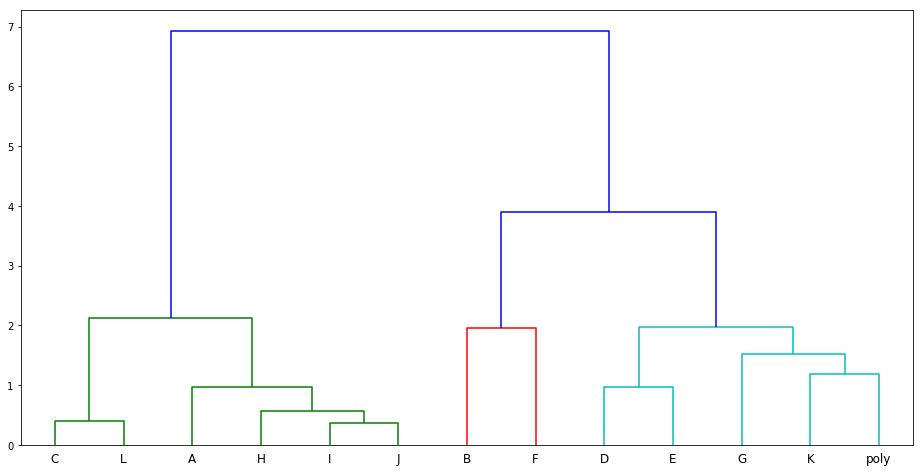

In [16]:
import scipy.cluster.hierarchy as shc
ax = plt.figure(figsize=(16,8))
dend = shc.dendrogram(shc.linkage(np.transpose(np.array(df_col1.iloc[:,:])), method='ward'), labels=antibody, color_threshold = 3)

cell  = list(df['cell'])
print(cell)



#dend = shc.dendrogram(shc.linkage(np.array(df_col1.iloc[:,:]), method='ward'), labels = cell)
plt.setp(dend .ax.set_xticklabels(df['cell'], rotation=90))